In [20]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
import math
import pandas as pd
import seaborn as sns

## Extract data from datasets

#### Framingham dataset

In [2]:
from clean_framingham import *

out = clean_framingham(extra=False)
data_fh = out[0]
y_fh = out[1]

#### Z-Alizadeh sani dataset

In [3]:
from clean_ZAlizadehsani import *

out = clean_ZAlizadehsani()
data_za = out[0]
y_za = out[1]

### UCI datasets

#### 1.) Hungary

In [4]:
from clean_UCI_h import *

out1 = clean_UCI_h(extra=False)
data_u1 = out[0]
y_u1 = out[1]

#### 2.) Switzerland

In [5]:
from clean_UCI_s import *

out2 = clean_UCI_s(extra=False)
data_u2 = out[0]
y_u2 = out[1]

#### 3.) Long Beach

In [6]:
from clean_UCI_l import *

out3 = clean_UCI_l(extra=False)
data_u3 = out[0]
y_u3 = out[1]


#### 4.) "New" dataset

In [7]:
from clean_UCI_n import *

out4 = clean_UCI_n(extra=False)
data_u4 = out[0]
y_u4 = out[1]

#### Stack UCI datasets together into single array for convenience

In [8]:
data_uci=np.hstack([data_u1,data_u2,data_u3,data_u4])
y_uci=np.hstack([y_u1,y_u2,y_u3,y_u4])

## Combine datasets together into one array

In [9]:
data = np.hstack([data_fh,data_za,data_uci])
y = np.hstack([y_fh,y_za,y_uci])

#### Create dataset with no UCI data

This subset is necessary to plot data for blood sugar, as the UCI datasets represent blood sugar as a binary 1/0 (True/False for blood sugars above 120 mg/dL) instead of the direct measurements. Because of this mismatch in data, the UCI datasets were left out when making the bargraph and pie charts specifically for blood sugar.

In [10]:
data_noUCI=np.hstack([data_fh,data_za])
y_noUCl = np.hstack([y_fh,y_za])

## Create heatmap of data features

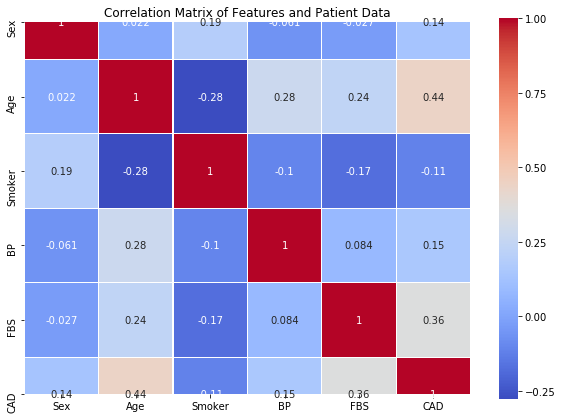

In [21]:
data = pd.DataFrame({'Sex':data[0],'Age':data[1],'Smoker':data[2],'BP':data[3],'FBS':data[4],'CAD':y})
#data = pd.DataFrame(data)
internal_chars = ['Sex','Age','Smoker','BP','FBS','CAD']
corrmat = data[internal_chars].corr()
f,ax = plt.subplots(figsize=(10,7))
#plt.xticks(rotation='90')
sns.heatmap(corrmat,linewidths=.1,square=True,annot=True,cmap='coolwarm')
ax.set_title('Correlation Matrix of Features and Patient Data')
plt.show()

## Plot pie graphs for demographics for each dataset

In [11]:
from plot_dataset_demographics import *

#### Framingham dataset

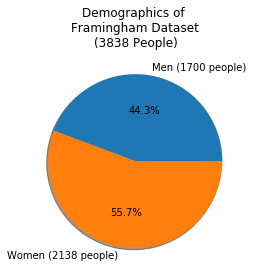

(3838, 1700, 2138)

In [12]:
plot_dataset_demographics(data_fh, 'Framingham')

#### Z-Alizadeh sani dataset

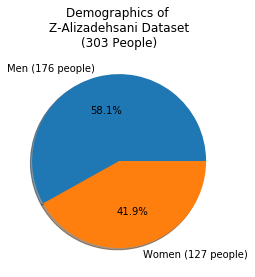

(303, 176, 127)

In [13]:
plot_dataset_demographics(data_za, 'Z-Alizadehsani')

#### UCI Datasets

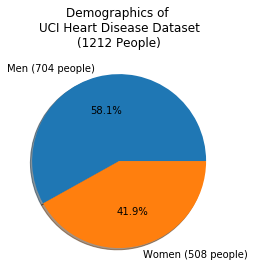

(1212, 704, 508)

In [14]:
plot_dataset_demographics(data_uci, 'UCI Heart Disease')

## Plot bargraphs for data

In [15]:
from plot_bargraphs import *

#### Age graphs

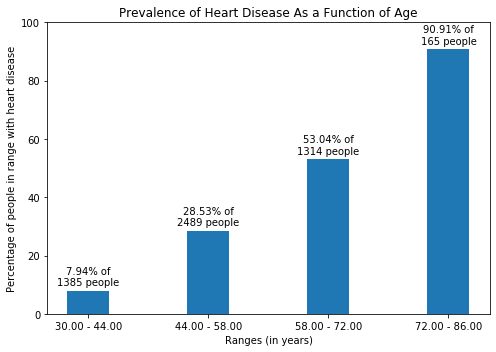

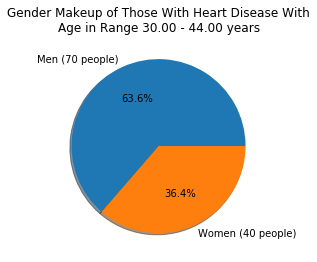

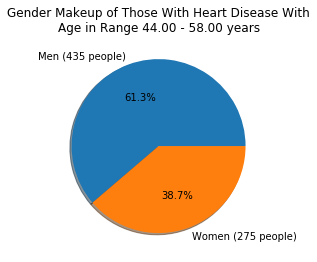

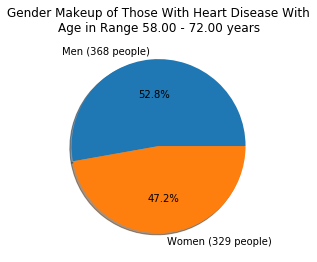

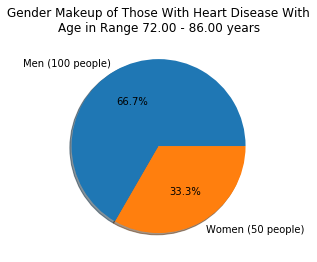

In [16]:
plot_bargraphs(data, y, data_ind = 1, num_ranges=4)

#### Smoking graphs

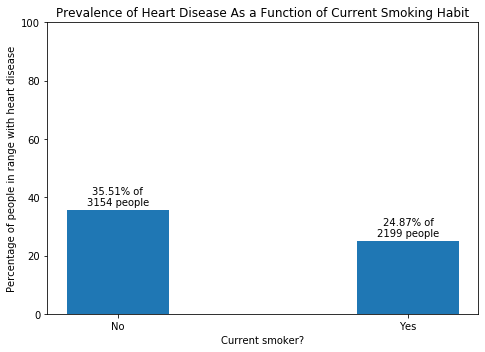

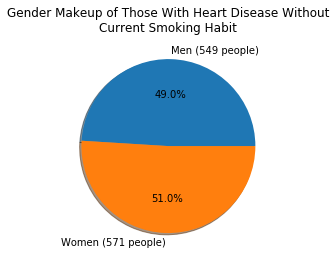

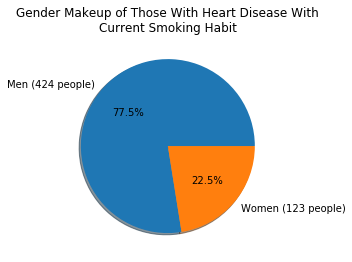

In [17]:
plot_bargraphs(data, y, data_ind = 2, num_ranges=4)

#### Blood pressure graphs

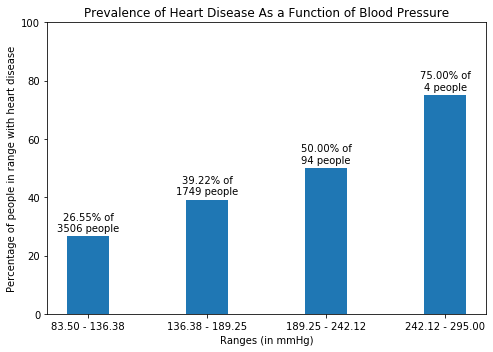

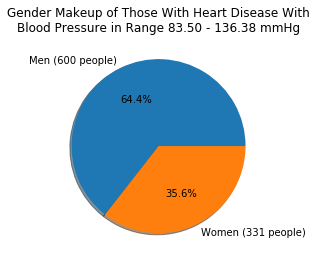

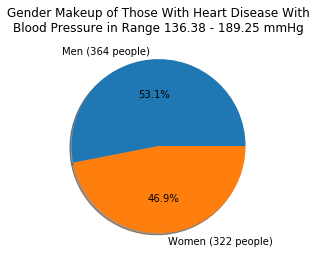

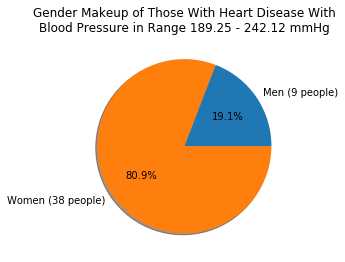

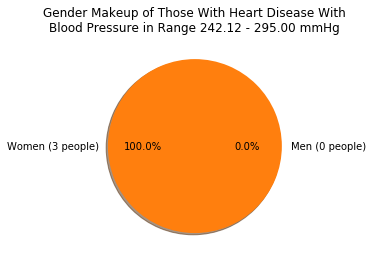

In [18]:
plot_bargraphs(data, y, data_ind = 3, num_ranges=4)

#### Blood sugar graphs

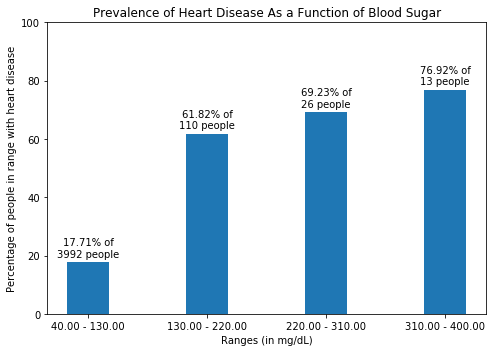

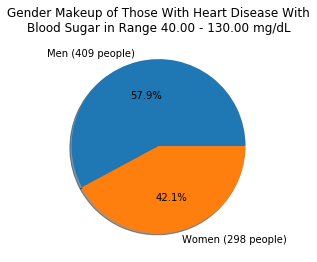

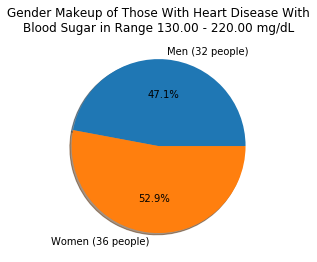

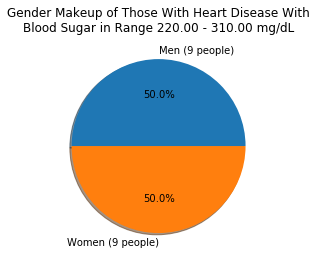

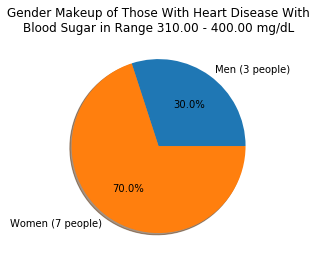

In [19]:
plot_bargraphs(data_noUCI, y_noUCI, data_ind = 4, num_ranges=4)